In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [65]:
SRC = "cluster_alphas.csv"
df = pd.read_csv(SRC)
df = df[[col for col in df.columns if "alpha/alpha" in col or "seed" in col]]
# rename columns with seed in them to "seed"
df = df.rename(columns={col: "seed" for col in df.columns if "seed" in col})
df.head()

,seed,alpha/alpha_0,alpha/alpha_1,alpha/alpha_10,alpha/alpha_11,alpha/alpha_12,alpha/alpha_13,alpha/alpha_14,alpha/alpha_15,alpha/alpha_2,alpha/alpha_3,alpha/alpha_4,alpha/alpha_5,alpha/alpha_6,alpha/alpha_7,alpha/alpha_8,alpha/alpha_9
0,3,-16.787184,-15.852798,-3.443884,-13.080455,-14.957611,10.769021,-12.396031,-7.116701,-15.021566,-13.133112,-12.315385,-12.171234,-14.274564,-3.411784,-8.486796,-10.264018
1,2,-16.879612,-18.110882,-3.933295,-2.381822,-14.914578,-15.904423,12.311345,-1.806366,-14.986099,-7.510508,-14.523934,-13.112488,-12.577435,-9.453401,-3.131144,-12.800236
2,1,-16.991974,-17.908606,-4.381251,-15.385196,-15.576905,-15.081228,10.838037,-2.645564,-12.429856,-13.519167,-15.298495,-12.162379,-6.543012,-12.277514,-13.807570,-3.561517
3,0,-16.684019,-17.154467,-2.098779,-3.104967,-16.650749,-16.526249,15.387645,-2.041737,-18.103699,-17.163771,-15.656542,-15.649958,-13.698466,-12.609161,-16.618645,-12.224510


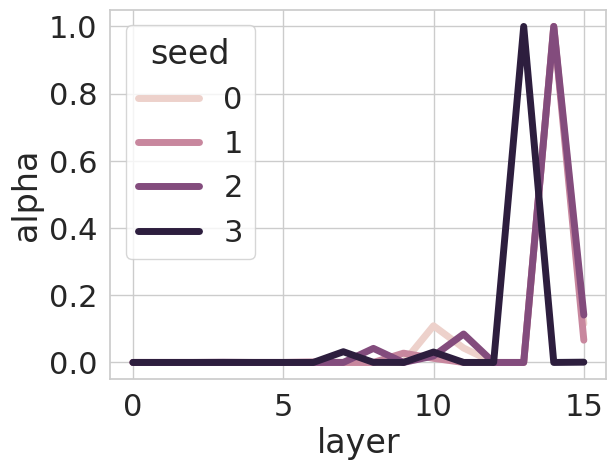

In [66]:
df_melt = df.melt(id_vars=["seed"], var_name="layers")
df_melt["layer"] = df_melt["layers"].str.replace("alpha/alpha_", "").astype(int)
df_melt["alpha"] = df_melt["value"].apply(lambda x: 1 / (1 + np.exp(-x)))

sns.set_theme(style="whitegrid", font_scale=2)
# lineplot with x=layer, y=d_value, hue=seed, styleofline=d
ax = sns.lineplot(data=df_melt, x="layer", y="alpha", hue="seed", linewidth=5)
plt.show()

In [67]:
loss = [0.4292, 0.386, 0.4308, 0.4825]
print(round(np.mean(loss), 3), round(np.std(loss), 3))

0.432 0.034
